In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
s = 'eukaryota'  # Change this to 'bacteria', 'eukaryota', or 'viruses' as needed

count_matrix_path = f'../../dataset/uniprotkb_reference_proteomes/big_{s}_countmatrix.csv'
count_matrix = pd.read_csv(count_matrix_path, index_col=0)
print(f"Original matrix shape: {count_matrix.shape}")
count_matrix = count_matrix[count_matrix.sum(axis=1) > 0]
print(f"Filtered matrix shape (removed zero-sum rows): {count_matrix.shape}")

Original matrix shape: (2760, 17089)
Filtered matrix shape (removed zero-sum rows): (2216, 17089)


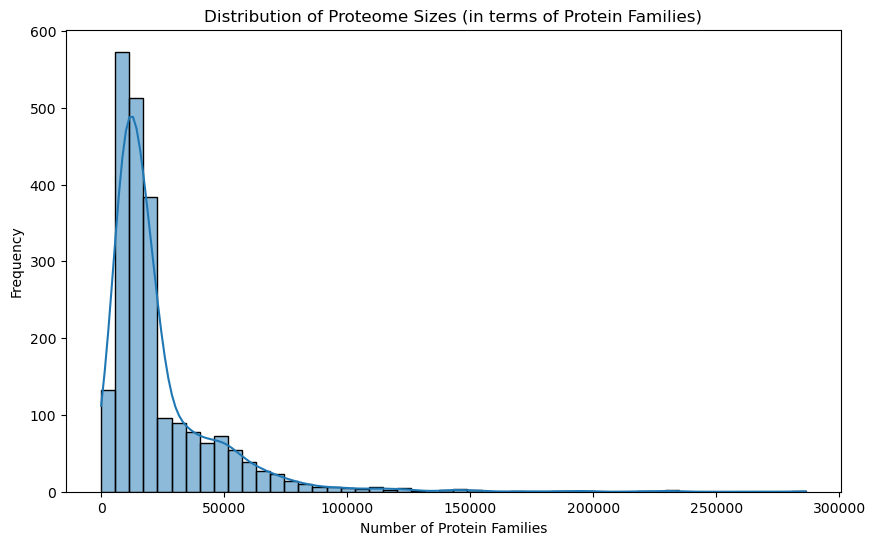

In [17]:
proteome_sizes = count_matrix.sum(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(proteome_sizes, bins=50, kde=True)
plt.title('Distribution of Proteome Sizes (in terms of Protein Families)')
plt.xlabel('Number of Protein Families')
plt.ylabel('Frequency')
plt.show()

In [18]:
thr_size = 1000
filtered_matrix = count_matrix[proteome_sizes >= thr_size]
print(f"Matrix shape after filtering proteomes with size >= {thr_size}: {filtered_matrix.shape}")

Matrix shape after filtering proteomes with size >= 1000: (2201, 17089)


In [19]:
normalized_matrix = filtered_matrix.div(filtered_matrix.sum(axis=1), axis=0)

/mnt/nvme_raid0/tmp/ipykernel_229898/2797640829.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


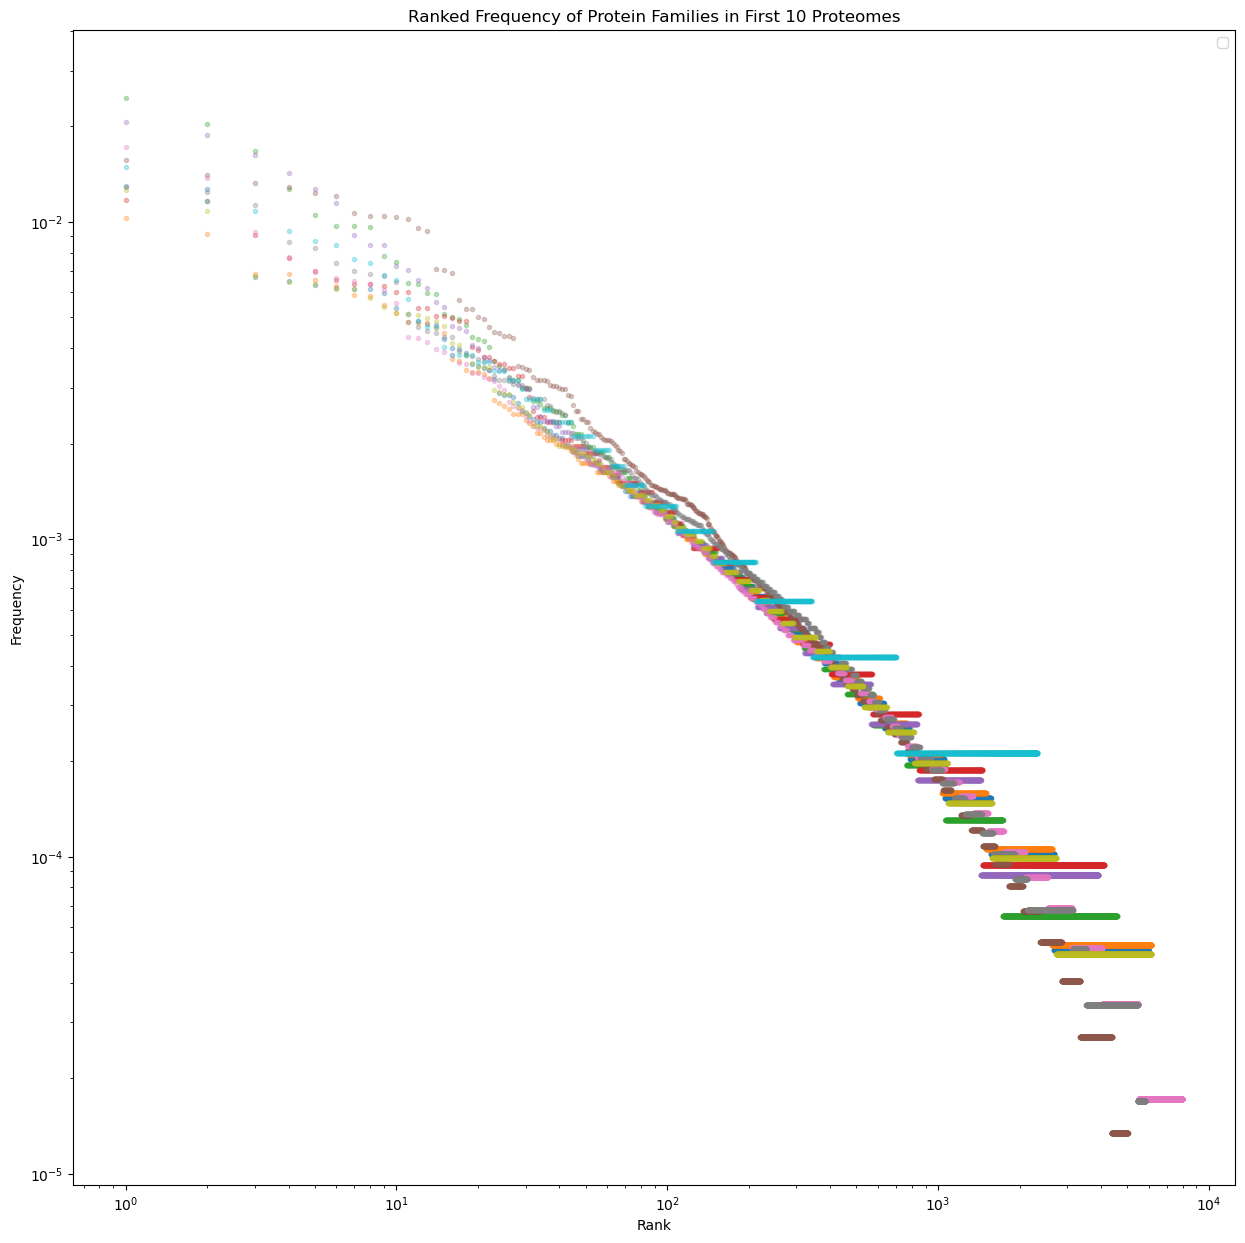

In [20]:
plt.figure(figsize=(15, 15))
for i in range(10):
	j = np.random.randint(0, normalized_matrix.shape[0])
	row = normalized_matrix.iloc[j]
	ranked = np.sort(row[row > 0])[::-1]
	plt.loglog(ranked, marker='o', markersize=3, linestyle='None', alpha=0.3)

# x = np.arange(2, 10000)
# y = 1/x
# k=0.2
# plt.loglog(x, k*y, linestyle='--', color='grey', label='$y=x^{-1}$', linewidth=4)

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Ranked Frequency of Protein Families in First 10 Proteomes')
plt.legend()
plt.show()

"Groups" may refer to protein families or protein clans

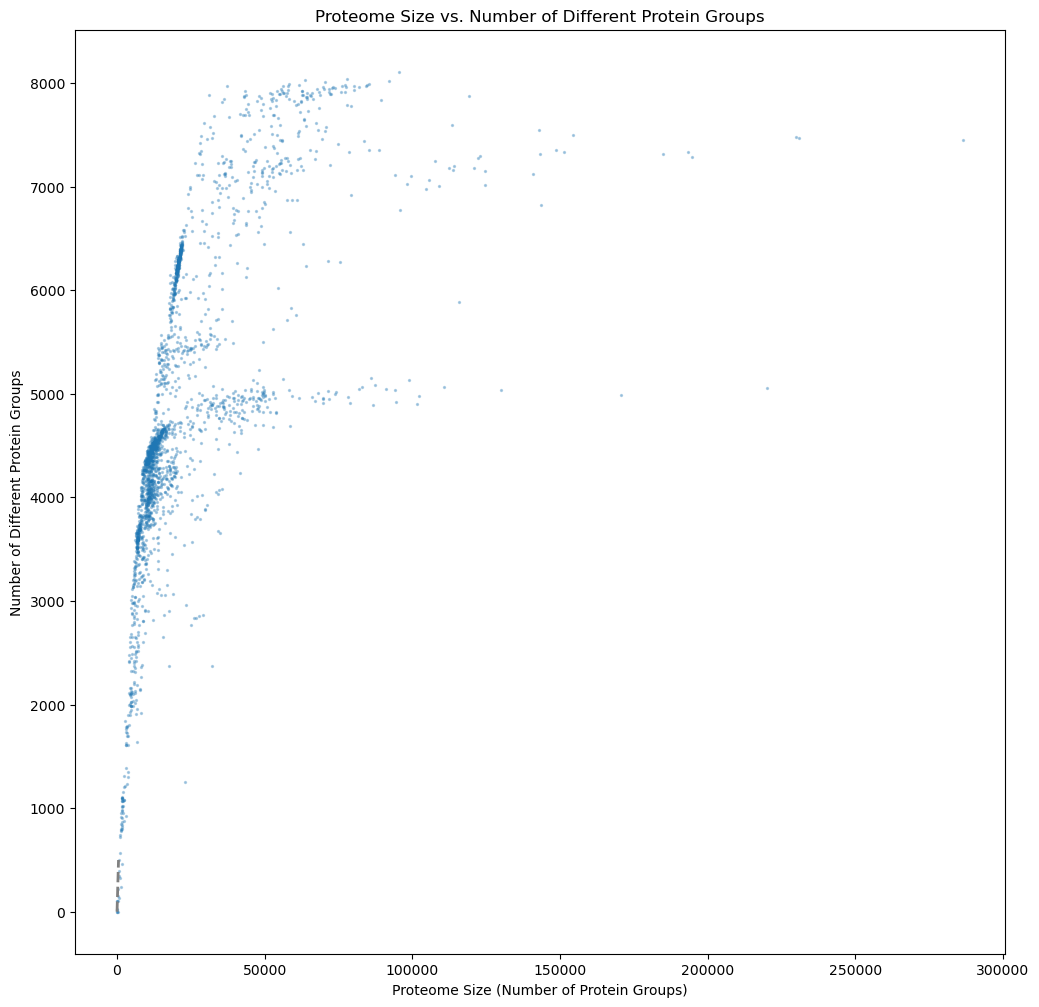

In [21]:
proteome_sizes = count_matrix.sum(axis=1)
n_different_families = (count_matrix > 0).sum(axis=1)
plt.figure(figsize=(12, 12))
x=np.arange(0, 500, 1)
y=x
plt.plot(x, y, linestyle='--', color='grey', label='$y=x$', linewidth=2)
plt.scatter(proteome_sizes, n_different_families, alpha=0.3, s=2)
plt.xlabel('Proteome Size (Number of Protein Groups)')
plt.ylabel('Number of Different Protein Groups')
# plt.xscale('log')
# plt.yscale('log')
plt.title('Proteome Size vs. Number of Different Protein Groups')
plt.show()

______

## NCBI Taxonomy